In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from collections import deque
from tqdm import tqdm  
import pandas as pd

In [2]:
P_0_matrix=np.array([[0.02232142,0.10229283,0.87538575],
                   [0.03426605,0.17175704,0.79397691],
                   [0.52324756,0.45523298,0.02151947]])

P_0_matrix


array([[0.02232142, 0.10229283, 0.87538575],
       [0.03426605, 0.17175704, 0.79397691],
       [0.52324756, 0.45523298, 0.02151947]])

In [3]:
P_1_matrix=np.array([[0.14874601,0.30435809,0.54689589],
                   [0.56845754,0.41117331,0.02036915],
                   [0.25265570,0.27310439,0.4742399]])
P_1_matrix

array([[0.14874601, 0.30435809, 0.54689589],
       [0.56845754, 0.41117331, 0.02036915],
       [0.2526557 , 0.27310439, 0.4742399 ]])

In [4]:
action_space=[0,1]
state_space=[0,1,2]
reward_matrix=[[0,0.37401552],[0,0.11740814],[0,0.07866135]]
N=100
M=40
epsilon=0.1
subsidy=0
arm_indexes=[i for i in range(N)]
gamma=0.99

In [5]:
def step(state,state_space,action,P_0_matrix,P_1_matrix,reward_matrix):
  new_state=state
  if(action==1):
    new_state=np.random.choice(state_space,replace=True,p=P_1_matrix[state])
    reward=reward_matrix[state][1]
  else:
    new_state=np.random.choice(state_space,replace=True,p=P_0_matrix[state])
    reward=reward_matrix[state][0]
  return [new_state,reward]

In [6]:
Q_values=[]
for i in range(N):
  Q_values.append([[0,0.37401552],[0,0.11740814],[0,0.07866135]])

In [7]:
def Q_value_update(Q_values,state,next_state,action,reward,arm_index,subsidy,alpha):
  if action==1:
    Q_values[arm_index][state][action]=(1-alpha)*(Q_values[arm_index][state][action])+alpha*(reward+max(Q_values[arm_index][next_state])-(np.array(Q_values[arm_index]).sum())/8)
  else:
    Q_values[arm_index][state][action]=(1-alpha)*(Q_values[arm_index][state][action])+alpha*(reward+subsidy+max(Q_values[arm_index][next_state])-(np.array(Q_values[arm_index]).sum())/8)




In [8]:
def act(Q_values,epsilon,state,arm_index):
  decision=np.random.binomial(n=1,p=epsilon,size=1)
  if decision==1:
    action=random.choice([0,1])
  else:
    action=np.argmax(Q_values[arm_index][state])
  return action

In [9]:
alternative_indexes=[0 for _ in range(N)]
current_state=[random.choice([0,1,2]) for _ in range(N)]

In [10]:
rewards=[]
subsidies=[]
action_sums=[]
betas=[]
alphas=[]
epsilon=0.1



In [11]:
for i in range(1,5000001):
  # top_M_indices=act(alternative_indexes,N,M,epsilon)
  action_sum=0
  reward_sum=0
  alpha=1/(1+(i/500))
  if i%100==0:
    beta=1/(1+np.ceil((i)*np.log(i)/500))
  else:
    beta=0
  for index in arm_indexes:
      # action=np.argmax(Q_values[index][current_state[index]])
      action=act(Q_values,epsilon,current_state[index],index)
      action_sum+=action
      x=step(current_state[index],state_space,action,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      Q_value_update(Q_values,current_state[index],new_state,action,reward,index,subsidy,alpha)
      current_state[index]=new_state
      reward_sum+=reward
      #print(x)
  # print(i)
  #print(reward_sum)

  subsidy+=beta*(action_sum-M)
  subsidies.append(subsidy)

  rewards.append(reward_sum)
  action_sums.append(action_sum)
  betas.append(beta)
  alphas.append(alpha)








KeyboardInterrupt: 

Text(0.5, 1.0, 'Subsidy vs Steps for Non Indexable Example')

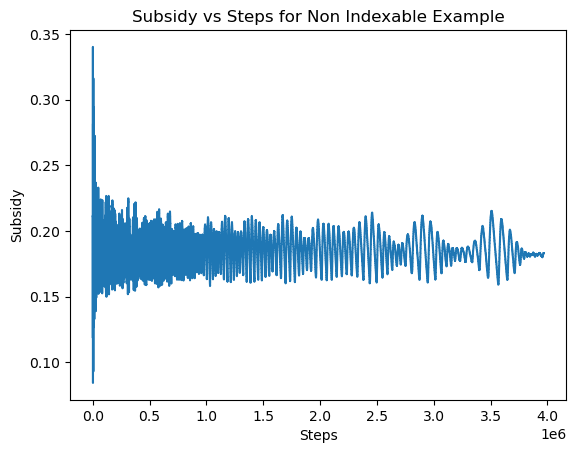

In [12]:
plt.plot(subsidies[10000:])
plt.xlabel('Steps')
plt.ylabel('Subsidy')
plt.title('Subsidy vs Steps for Non Indexable Example')

In [13]:
df=pd.DataFrame(rewards)


Text(0.5, 1.0, ' Moving Average of reward for Non Indexable Example ')

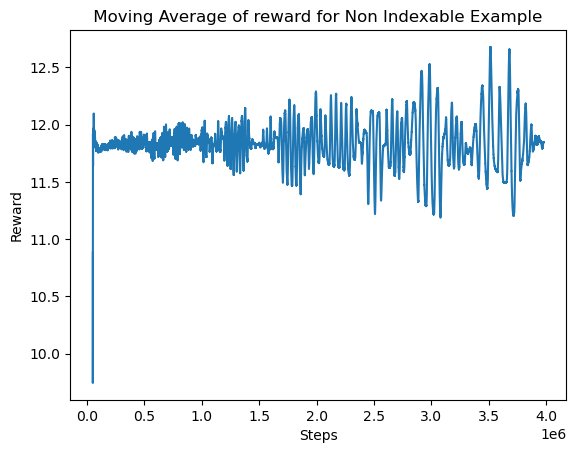

In [14]:
plt.plot(df[0][50000:].rolling(100000,min_periods=1).mean())
# plt.axhline(y = 14, color = 'r', linestyle = '-') 
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title(' Moving Average of reward for Non Indexable Example ')


In [15]:
df[0][999999-2]

12.100360600000007

Text(0.5, 1.0, ' Moving Average of number of arms activated for Non Indexable Example ')

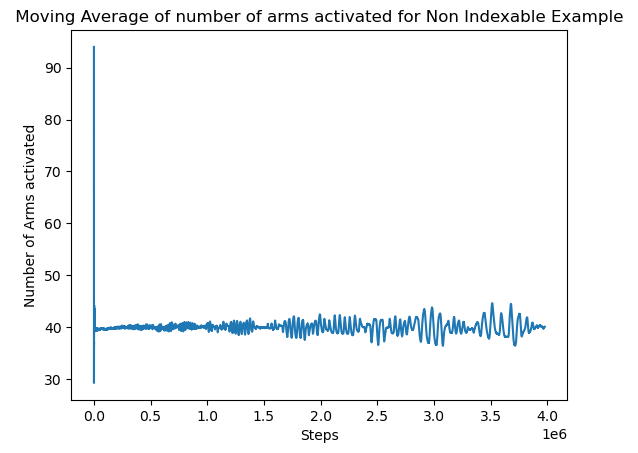

In [16]:
df['action_sums']=action_sums
plt.plot(df['action_sums'].rolling(100000,min_periods=1).mean())
plt.xlabel('Steps')
plt.ylabel('Number of Arms activated')
plt.title(' Moving Average of number of arms activated for Non Indexable Example ')


In [17]:
Q_values

[[[0.2859312123861108, 0.4804346355272596],
  [0.27881118671164823, 0.2782360984170194],
  [0.3337295541595587, 0.20440050373083232]],
 [[0.2855817667440482, 0.4801275666570914],
  [0.2778931805742978, 0.2781816290806025],
  [0.333992710699147, 0.20474287573818498]],
 [[0.2856380609313577, 0.4803333900009895],
  [0.27855318564694587, 0.2787813735167955],
  [0.3339743744990427, 0.20497409644497683]],
 [[0.28615902236202445, 0.480159984582214],
  [0.27878196254587995, 0.2794600633469511],
  [0.33467558928663454, 0.204139793569215]],
 [[0.28540234351161353, 0.48012097817563554],
  [0.2792218474762341, 0.27913598465962264],
  [0.3350386790304155, 0.20430662149469148]],
 [[0.2856003009685317, 0.47881955723025876],
  [0.27824308760931343, 0.2783129389702175],
  [0.3328484058496079, 0.2050756079075053]],
 [[0.2858605198036722, 0.4810974743687389],
  [0.2792168782866147, 0.2790880578417261],
  [0.3347074115566515, 0.20305354341672582]],
 [[0.28570744717948304, 0.4799290235350783],
  [0.2784074

In [18]:
#using learnt indices
current_state=[0 for _ in range(N)]
reward_sums_alt_index=[]
alternative_indexes=[0 for _ in range(N)]
for i in range(1,10001):
  indices_to_pull=[]
  indices_to_pull_temp=[]
  reward_sum_alt_index=0
  reward_sum_whittle_index=0
  for index in arm_indexes:
    alternative_indexes[index]=Q_values[index][current_state[index]][1]-Q_values[index][current_state[index]][0]
    indices_to_pull = sorted(range(len(alternative_indexes)), key = lambda j: alternative_indexes[j])[-M:]
  # indices_to_pull_temp = sorted(range(len(alternative_indexes)), key = lambda j: alternative_indexes[j])[-M:]
  # for x in indices_to_pull_temp:
  #   if alternative_indexes[x]>0:
  #     indices_to_pull.append(x)
  for index in arm_indexes:
    if index in indices_to_pull:
      x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
    else:
      x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_alt_index+=reward
  reward_sums_alt_index.append(reward_sum_alt_index)

In [19]:
whittle_index_arms=[0 for _ in range(N)]
current_state=[0 for _ in range(N)]
reward_sums_whittle_index=[]
actual_whittle_indexes=[0.3728912933740694, 0.182126984234289, -0.017108159966750868]

for i in range(1,10001):
  reward_sum_whittle_index=0
  for index in arm_indexes:
    whittle_index_arms[index]=actual_whittle_indexes[current_state[index]]
  #print(whittle_index_arms)
  indices_to_pull = sorted(range(len(whittle_index_arms)), key = lambda j: whittle_index_arms[j])[-M:]
  # print(indices_to_pull)
  for index in arm_indexes:
    if index in indices_to_pull:
      x=step(current_state[index],state_space,1,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_whittle_index+=reward
    else:
      x=step(current_state[index],state_space,0,P_0_matrix,P_1_matrix,reward_matrix)
      new_state=x[0]
      reward=x[1]
      current_state[index]=new_state
      reward_sum_whittle_index+=reward
  reward_sums_whittle_index.append(reward_sum_whittle_index)

Text(0.5, 1.0, ' Moving Average of reward for Non Whittle Indexable Example ')

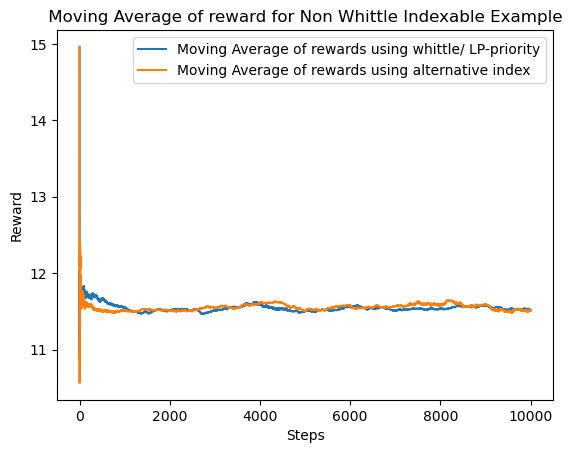

In [21]:
df_new=pd.DataFrame()

df_new['reward_whittle']=reward_sums_whittle_index

df_new['reward_alternate']=reward_sums_alt_index

plt.plot(df_new['reward_whittle'][:50000].rolling(1000,min_periods=1).mean(),label='Moving Average of rewards using whittle/ LP-priority')
plt.plot(df_new['reward_alternate'][:50000].rolling(1000,min_periods=1).mean(),label='Moving Average of rewards using alternative index')
# plt.plot(df_new['reward_alternate'])
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend()
plt.title(' Moving Average of reward for Non Whittle Indexable Example ')

In [ ]:
# df_new['reward_alternate'][:50000].rolling(1000,min_periods=1).mean()

NameError: name 'df_new' is not defined